
# **BiotrAIn 2025 Tutorial: Data integration for microbiome research using scikit-bio**


# Section 04: Clustering (40 min)

- Time: 11:00 - 12:00:00 EDT, June 17, 2025
Welcome to the practical session 04. created by Víctor Muñiz, Nelly Selem (Secodment host), Jeanett Daga (Secodment).

🏆 QUESTIONS

1. How can we define and find groups on high dimensional data?
2. Given some vector representation of data, which are the main methodologies for cluster analysis?
3. What is the effect of different distance functions for clustering?

🎯 AIMS

1. To introduce the main methodologies for cluster analysis
2. To verify the impact of different low-dimensional representations of data in the cluster analysis
3. To present different visualizations of high-dimensional, sparse data and the clustering results.

🔑 KEY POINTS

Hierarchical clustering
K-means clustering
HDBSCAN
UMAP
Distance matrix

### Background

[Cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis) is an unsupervised machine learning technique used to group similar data points together based on their features or patterns. The goal is to divide a dataset into clusters (or segments) where objects within the same cluster are more alike to each other than to those in other clusters.

Clustering helps in discovering hidden structures and insights from unlabelled data.

In Chapter 3, we show that there are different ways to obtain a vector representation of the data, and we explore some reduction dimension techniques for these representations.
Here, we will use some clustering techniques that are suitable for data with those characteristics.

## Preparation ( 5 min - 11:00 am)

Install the latest version of scikit-bio if it hasn't been (needed for every Google Colab instance).

In [ ]:
from importlib.util import find_spec

In [ ]:
if find_spec('skbio') is None:
    !pip install -q scikit-bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 58.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 103.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
import skbio
skbio.__version__

'0.6.3'

We will be using different functions available in the script file ``aux_functions.py``. In order to use them, we need to load them from local drive by running the following code:

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive/')
# working directory
os.chdir('/content/drive/My Drive/Module 2 Clustering/2. Notebooks_Latam/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
from skbio import Table
from skbio.diversity import beta_diversity



we are using the following data to make a Beta biodiversity analysis To compute and visualize beta diversity, you need:

1. Sample metadata (latam_samples.tsv): environmental metadata per sample.
2. feature table (latam_ogu.biom)counts of microbial taxa (OGUs) per sample.
3. Phylogenetic tree (latam_ogu.nwk)for UniFrac.
4. Taxonomy Taxonomy assignment file (latam_ogu.tax). for heatmaps

In [ ]:
from aux_functions import get_data

# Create a text variable to use after as a path to read files
#github_data = "https://raw.githubusercontent.com/nselem/biotraintemp/refs/heads/main/data/"
data_path = "../1.Data/"
# data options:
#1 Latam Shotgun (default), loads the Latin America (filtered) dataset.
#2 EMP 500 Shotgun, loads the global dataset
#3 Latam Amplicon, loads the Latin America (filtered) 16S dataset.
biom_df, metadata_df = get_data(data_path, data=1)

In [ ]:
# labels for each sample
labels_data = metadata_df['empo_2']
labels_data

,empo_2
13114.jensen.43.s012,Saline
13114.jensen.43.s013,Saline
13114.jensen.43.s014,Saline
13114.pinto.63.s001,Plant
13114.pinto.63.s002,Plant
...,...
13114.zaneveld.9.s006,Animal
13114.zaneveld.9.s010,Animal
13114.zaneveld.9.s011,Animal
13114.zaneveld.9.s012,Animal


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from aux_functions import get_distance_matrix, get_tfidf, get_lsa, get_nmf, hierarchical_cluster

## Hierarchical clustering (10 min - 11:05 am)

Clustering algorithm which builds a tree-like structure (dendrogram) using agglomerative (bottom-up) or divisive (top-down) methods.

![Hierarchical agglomerative clustering](https://dashee87.github.io/images/hierarch.gif)

Figure 1. Hierarchical agglomerative clustering illustration.

We will use data based on two weighting schemes for gene occurrence: frecuency (`biom_df`) and inverse-frecuency (`biom_tfidf`).

In [ ]:
from aux_functions import get_tfidf, hierarchical_cluster

tfidf_vect, tfidf = get_tfidf(biom_df)
biom_tfidf = pd.DataFrame(tfidf,columns=tfidf_vect.get_feature_names_out(),index=biom_df.index)

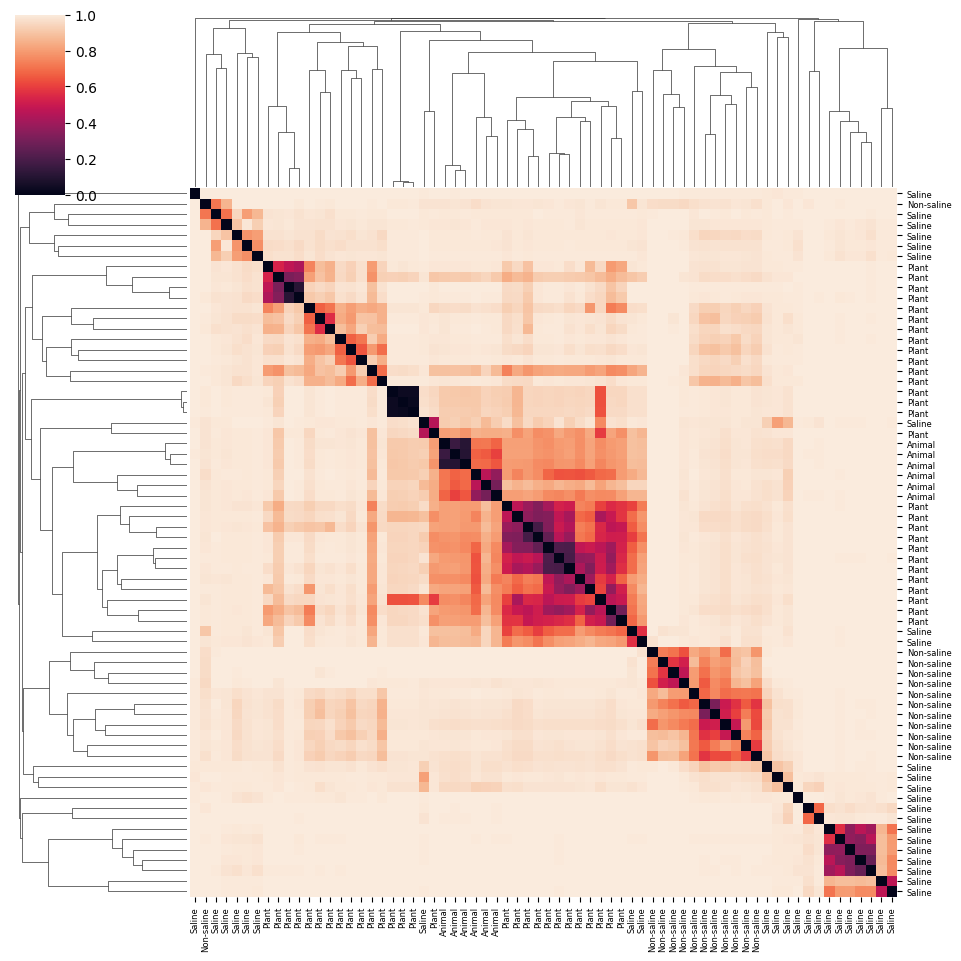

In [ ]:
lk = 'average' #'single' 'complete' 'average' 'ward'
metric = 'braycurtis' #'euclidean' 'braycurtis' 'cosine'
hierarchical_cluster(biom_tfidf, link = lk, labels = labels_data,
                     plot_dist_matrix = True, metric_d = metric)

We can use hierarchical clustering with a vector representation of `biom` obtained with some dimention reduction technique from Chapter 3

In [ ]:
dir_fact = '../models/'
n_comp = 50
exfact = True
nf = 'svd_tfidf'
fact_svd = get_lsa(biom_tfidf, exist_fact = exfact, fact_path = dir_fact, n_file = nf, n_comp = n_comp, save=True)

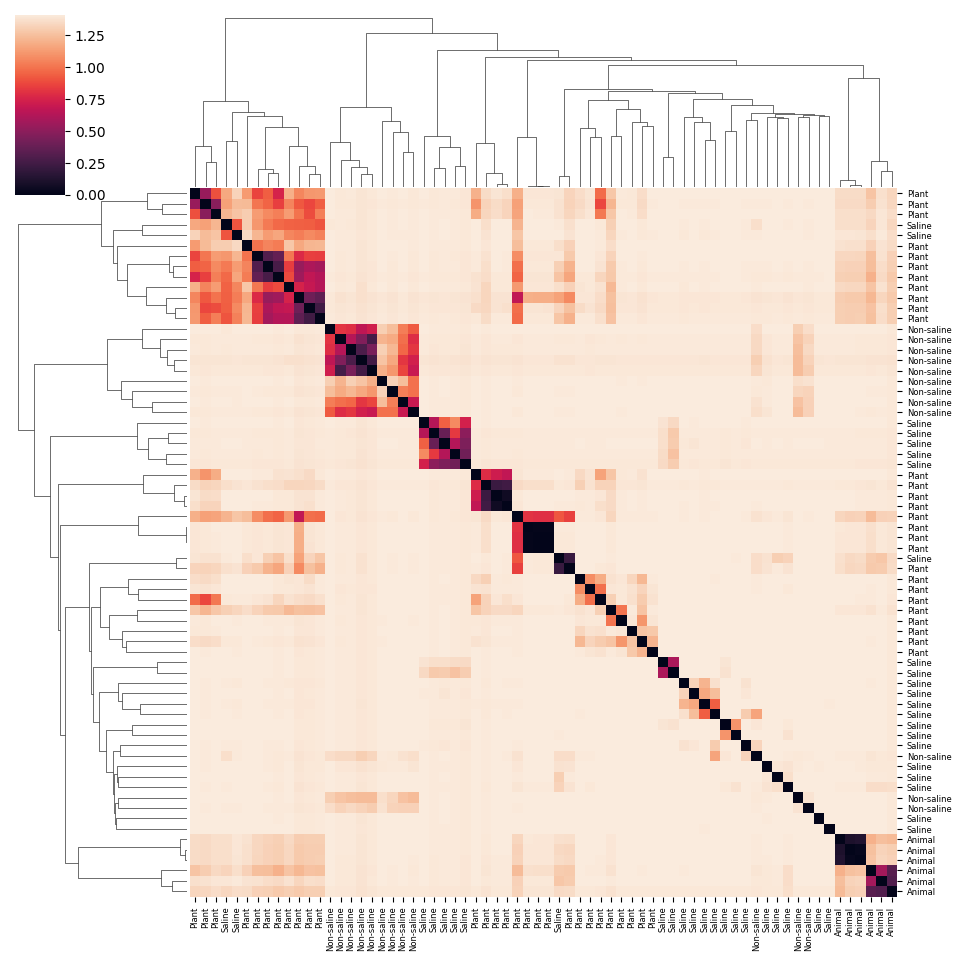

In [ ]:
lk = 'ward' #'single' 'complete' 'average' 'ward'
metric = 'euclidean' # 'braycurtis' 'cosine'
hierarchical_cluster(fact_svd, link = lk, labels = labels_data,
                     plot_dist_matrix = True, metric_d = metric)

## K-means (15 min - 11:15 am)

This algorithm, partitions data into $k$ clusters (see Figure 3) by minimizing within (or intra) cluster variance (Figure 2).

![Inter and intra cluster distance](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*FbPP5TvWtA2yQ14xxsRWvQ.gif)

Figure 2. Inter and intra cluster distance.

![Inter and intra cluster distance](https://dashee87.github.io/images/kmeans.gif)

Figure 3. $k-$means procedure.

$K-$ means uses **euclidean distance** between data, so it would not be the best choice for high-dimensional data due to the [curse of dimensionality](https://en.wikipedia.org/wiki/Curse_of_dimensionality), then, we will use some of the reduced dimensionality representation we obtained in Chapter 3.

### Factorization-based dimension reduction

In [ ]:
labels_data.unique()

array(['Saline', 'Plant', 'Non-saline', 'Animal'], dtype=object)

In [ ]:
from sklearn.cluster import KMeans, MiniBatchKMeans
X = fact_svd
nclust = len(labels_data.unique())
kmeans = KMeans(n_clusters=nclust, init='k-means++', n_init='auto', random_state=42)
y_km = kmeans.fit_predict(X)
#y_km = y_km.astype('category')

In [ ]:
embedding = fact_svd
reduced_proj = pd.DataFrame({'x1': embedding.iloc[:,0], 'x2': embedding.iloc[:,1], 'label': labels_data,
                            'clust': [str(val) for val in y_km]})
reduced_proj['clust'].astype('category')
fig = px.scatter(reduced_proj, x='x1', y='x2', hover_data='label', color = 'clust', title='reduced plot')
fig.update_layout(autosize=False, width=500, height=500)
fig.show()

### Manifold learning methods

In [ ]:
import umap.umap_ as umap

reducer = umap.UMAP(n_neighbors=5, n_components=2, min_dist=.2, metric='braycurtis', random_state=42)
embedding = reducer.fit_transform(biom_tfidf)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [ ]:
X = embedding
kmeans = KMeans(n_clusters=nclust, init='k-means++', n_init='auto', random_state=42)
y_km = kmeans.fit_predict(X)
#y_km = y_km.astype('category')

In [ ]:
reduced_proj = pd.DataFrame({'x1': embedding[:,0], 'x2': embedding[:,1], 'label': labels_data,
                            'cluster': [str(val) for val in y_km]})
#reduced_proj['cluster'].astype('category')
fig = px.scatter(reduced_proj, x='x1', y='x2', hover_data='label', color = 'cluster', title='UMAP')
fig.update_layout(autosize=False, width=500, height=500)
fig.show()

### Distance-based + dimension reduction, representations

In [ ]:
d_matrix = get_distance_matrix(biom_tfidf, 'braycurtis')
#d_matrix.isna().any().any()
#d_matrix = np.round(d_matrix,5)

Dimension reduction

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA

pca = PCA(n_components=3)
embedding = pca.fit_transform(d_matrix)

X = embedding
kmeans = KMeans(n_clusters=nclust, init='k-means++', n_init='auto', random_state=42)
y_km = kmeans.fit_predict(X)
#y_km = y_km.astype('category')

In [ ]:
reduced_proj = pd.DataFrame({'x1': embedding[:,0], 'x2': embedding[:,1], 'label': labels_data,
                            'cluster': [str(val) for val in y_km]})
#reduced_proj['cluster'].astype('category')
fig = px.scatter(reduced_proj, x='x1', y='x2', hover_data='label', color = 'cluster', title='PCA')
fig.update_layout(autosize=False, width=500, height=500)
fig.show()

In [ ]:
from sklearn.manifold import MDS

nmds = MDS(n_components=3, dissimilarity='precomputed', metric=False, random_state=42)
embedding = nmds.fit_transform(d_matrix)

X = embedding
kmeans = KMeans(n_clusters=nclust, init='k-means++', n_init='auto', random_state=42)
y_km = kmeans.fit_predict(X)
#y_km = y_km.astype('category')

In [ ]:
reduced_proj = pd.DataFrame({'x1': embedding[:,0], 'x2': embedding[:,1], 'label': labels_data,
                            'cluster': [str(val) for val in y_km]})
#reduced_proj['cluster'].astype('category')
fig = px.scatter(reduced_proj, x='x1', y='x2', hover_data='label', color = 'cluster', title='non-metric MDS')
fig.update_layout(autosize=False, width=500, height=500)
fig.show()

## DBSCAN (10 min - 11:30 am)

DBSCAN (**Density-Based** Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that groups data points based on their proximity and density.

The methodology involves randomly pick points which could start a cluster depending on the density of data around it, then, expands the cluster by adding all reachable points within some neighborhood $\epsilon$. The steps are repeated for unvisited points until all points are processed. See Figure 4 for an illustration.



![DBSCAN](https://dashee87.github.io/images/DBSCAN_tutorial.gif)

Figure 4. DBSCAN procedure.

In [ ]:
from sklearn.cluster import DBSCAN

reducer = umap.UMAP(n_neighbors=5, n_components=2, min_dist=.12, metric='braycurtis',
                    random_state=42)
embedding = reducer.fit_transform(biom_tfidf)
X = embedding

dbscan = DBSCAN(eps=0.8, min_samples=5, metric='euclidean')
y_db = dbscan.fit_predict(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [ ]:
reduced_proj = pd.DataFrame({'x1': embedding[:,0], 'x2': embedding[:,1], 'label': labels_data,
                            'cluster': [str(val) for val in y_db]})
#reduced_proj['cluster'].astype('category')
fig = px.scatter(reduced_proj, x='x1', y='x2', hover_data='label', color = 'cluster', title='UMAP')
fig.update_layout(autosize=False, width=500, height=500)
fig.show()

In [ ]:
pca = PCA(n_components=3)
embedding = pca.fit_transform(d_matrix)
X = embedding

# Use PCA coordinates from above
dbscan = DBSCAN(eps=0.3, min_samples=3, metric='euclidean')
y_db = dbscan.fit_predict(X)

In [ ]:
reduced_proj = pd.DataFrame({'x1': embedding[:,0], 'x2': embedding[:,1], 'label': labels_data,
                            'cluster': [str(val) for val in y_db]})
#reduced_proj['cluster'].astype('category')
fig = px.scatter(reduced_proj, x='x1', y='x2', hover_data='label', color = 'cluster', title='PCA')
fig.update_layout(autosize=False, width=500, height=500)
fig.show()

### Exercise # 4.1 Clusetring with Jaccard metric

In [ ]:
# Binarize dataframe (presence/absence)
biom_df_binary = (biom_df > 0).astype(int)
biom_df_binary


,G000005825,G000006175,G000006605,G000006725,G000006745,G000006785,G000006845,G000006865,G000006925,G000006965,...,G902812375,G902812395,G902825795,G902825845,G902825965,G902826025,G902826465,G902826605,G902827015,G902827055
13114.jensen.43.s012,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
13114.jensen.43.s013,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
13114.jensen.43.s014,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
13114.pinto.63.s001,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.pinto.63.s002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114.zaneveld.9.s006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.zaneveld.9.s010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.zaneveld.9.s011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13114.zaneveld.9.s012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Computes Jaccard distance

In [ ]:
jaccard_dm = beta_diversity("jaccard", biom_df_binary)
jaccard_df = jaccard_dm.to_data_frame()
jaccard_df

,13114.jensen.43.s012,13114.jensen.43.s013,13114.jensen.43.s014,13114.pinto.63.s001,13114.pinto.63.s002,13114.pinto.63.s003,13114.pinto.63.s004,13114.pinto.63.s005,13114.pinto.63.s006,13114.pinto.63.s007,...,13114.stewart.26.s006,13114.stewart.26.s007,13114.stewart.26.s008,13114.zaneveld.9.s004,13114.zaneveld.9.s005,13114.zaneveld.9.s006,13114.zaneveld.9.s010,13114.zaneveld.9.s011,13114.zaneveld.9.s012,13114.zaneveld.9.s022
13114.jensen.43.s012,0.000000,0.685239,0.842507,0.935381,0.926755,0.927890,0.913415,0.927083,0.926444,0.914347,...,0.854079,0.759064,0.821874,0.889849,0.894593,0.895279,0.923993,0.952989,0.921440,0.706720
13114.jensen.43.s013,0.685239,0.000000,0.798991,0.946271,0.942408,0.955083,0.937202,0.951576,0.946809,0.948698,...,0.837468,0.814600,0.839612,0.893409,0.897010,0.893476,0.930543,0.960600,0.921717,0.791247
13114.jensen.43.s014,0.842507,0.798991,0.000000,0.903226,0.915601,0.883994,0.915612,0.911323,0.933142,0.896254,...,0.930779,0.912212,0.927369,0.857554,0.843703,0.856721,0.878092,0.926733,0.881064,0.902861
13114.pinto.63.s001,0.935381,0.946271,0.903226,0.000000,0.635688,0.689655,0.672727,0.645545,0.700777,0.652893,...,0.966752,0.944322,0.961296,0.779174,0.760994,0.768657,0.756563,0.763006,0.758264,0.945783
13114.pinto.63.s002,0.926755,0.942408,0.915601,0.635688,0.000000,0.766942,0.699313,0.727273,0.697757,0.716724,...,0.971839,0.947569,0.964301,0.819970,0.808917,0.805031,0.794175,0.810811,0.803754,0.945838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114.zaneveld.9.s006,0.895279,0.893476,0.856721,0.768657,0.805031,0.778182,0.795414,0.800676,0.855395,0.782765,...,0.950128,0.919946,0.938126,0.550308,0.525164,0.000000,0.662592,0.752747,0.677215,0.902098
13114.zaneveld.9.s010,0.923993,0.930543,0.878092,0.756563,0.794175,0.777523,0.782998,0.795359,0.871990,0.783296,...,0.965588,0.946296,0.959222,0.659574,0.628205,0.662592,0.000000,0.561644,0.538922,0.936684
13114.zaneveld.9.s011,0.952989,0.960600,0.926733,0.763006,0.810811,0.753541,0.754144,0.789873,0.877465,0.788043,...,0.979740,0.960476,0.976132,0.765625,0.737143,0.752747,0.561644,0.000000,0.665541,0.961985
13114.zaneveld.9.s012,0.921440,0.921717,0.881064,0.758264,0.803754,0.756592,0.766798,0.789963,0.849348,0.783890,...,0.964683,0.935863,0.955464,0.657676,0.648352,0.677215,0.538922,0.665541,0.000000,0.926271


/content/drive/.shortcut-targets-by-id/1eKs0tfWS-cK-e7yEJDo_SBtQTO6Qv6NR/Module 2 Clustering/2. Notebooks_Latam/aux_functions.py:535: ClusterWarning:

The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



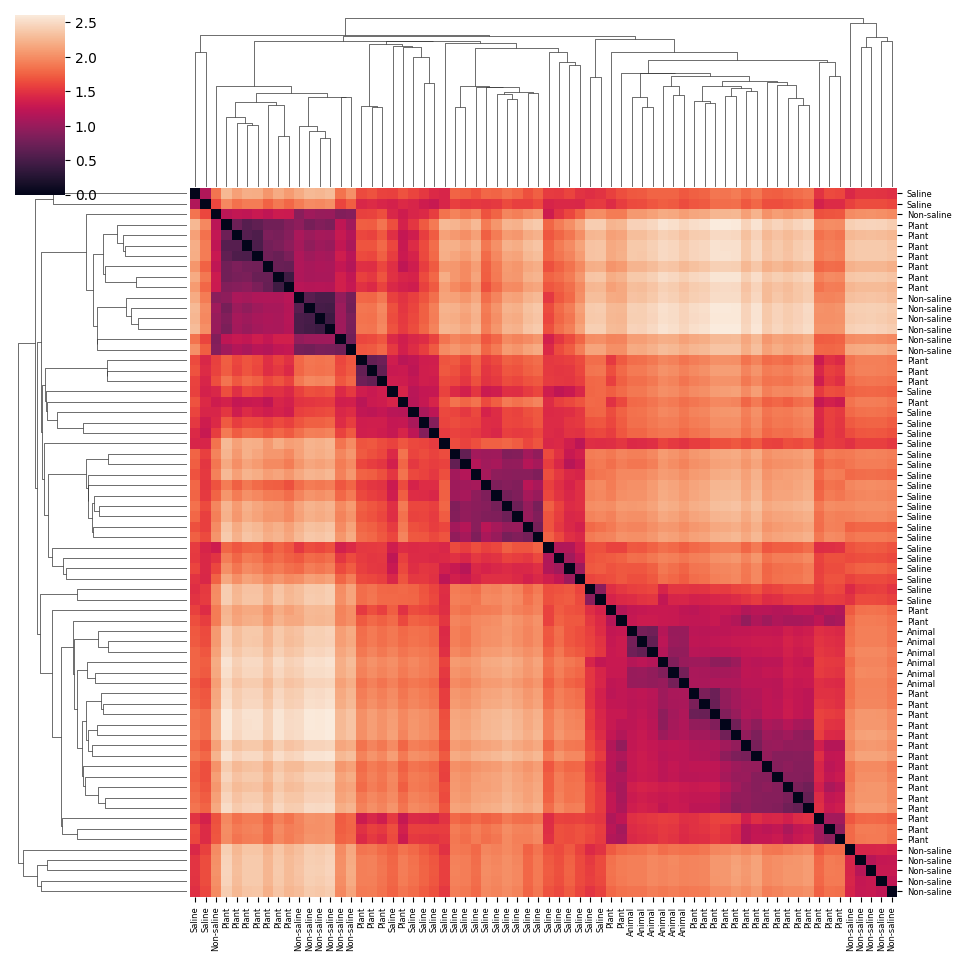

In [ ]:
lk = 'single' #'single' 'complete' 'average' 'ward'
metric = 'euclidean' #'euclidean' 'braycurtis' 'cosine'
hierarchical_cluster(jaccard_df, link = lk, labels = labels_data,
                     plot_dist_matrix = True, metric_d = metric)

## Self evaluation poll (10 min - 11:40 am)

This short assessment will help reinforce your understanding and prepare you for further analysis and integration tasks in microbiome research.

📌 Click the link below to begin the quiz: 👉  [Poll link, Quiz 4](https://pollev.com/biotrainaicabana135)

1. Select “**Skip for now**” when prompted to log in.

2. Enter **your name** to join as a participant.

3. **Select all correct answers** — some questions may have multiple correct options.

4. You can review your **results** at the end of the quiz.


## Evaluation of second morning session ( 3 min - 11:50 am)

Please complete the session evaluation by filling out the following form: [Evaluation of second morning sesion](https://docs.google.com/forms/d/e/1FAIpQLSctmNOXjAtp-1sSKCgBKlT2L_iCVnFzuY_ohKESJ2_A7XvrMw/viewform?usp=header)